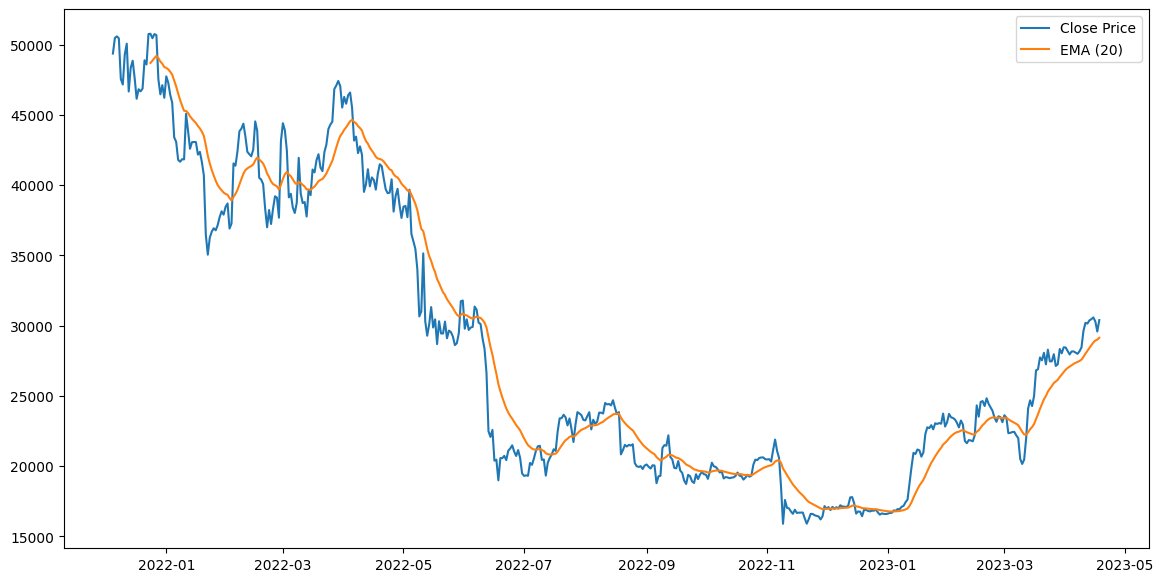

In [1]:
import pandas as pd
import ta
import matplotlib.pyplot as plt

# Load data (example with a single asset)
data = pd.read_csv('../data/BTCUSDT_historical.csv')
data['time'] = pd.to_datetime(data['open_time'])
data.set_index('time', inplace=True)

# Add Volume-based Indicators
data['OBV'] = ta.volume.OnBalanceVolumeIndicator(close=data['close'], volume=data['volume']).on_balance_volume()

# Add Volatility-based Indicators
data['ATR'] = ta.volatility.AverageTrueRange(high=data['high'], low=data['low'], close=data['close']).average_true_range()

# Add Trend-based Indicators
data['EMA'] = ta.trend.EMAIndicator(close=data['close'], window=20).ema_indicator()

# Add Momentum-based Indicators
data['RSI'] = ta.momentum.RSIIndicator(close=data['close'], window=14).rsi()

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data['close'], label='Close Price')
plt.plot(data['EMA'], label='EMA (20)')
plt.legend()
plt.show()


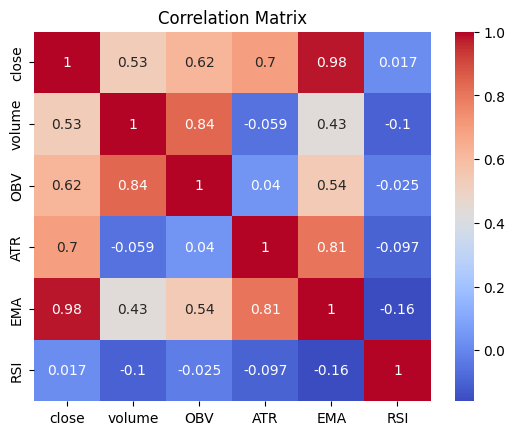

In [2]:
# Calculate correlation
correlation = data[['close', 'volume', 'OBV', 'ATR', 'EMA', 'RSI']].corr()

# Display heatmap
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [31]:
import backtrader as bt
import pandas as pd

# Define the strategy
class TestStrategy(bt.Strategy):
    def __init__(self):
        self.ema = bt.indicators.EMA(self.data.close, period=20)
        self.rsi = bt.indicators.RSI(self.data.close, period=14)

    def next(self):
        if not self.position:
            if self.data.close > self.ema and self.rsi < 30:
                self.buy(size=1)
        else:
            if self.rsi > 70:
                self.sell(size=1)

# Initialize Backtest
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)

# Load Data
# Assuming 'data' is a DataFrame with the necessary columns
data = pd.read_csv('../data/NEOUSDT_historical.csv')
data['open_time'] = pd.to_datetime(data['open_time'])
data.set_index('open_time', inplace=True)
data_bt = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_bt)

# Add analyzers
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')

# Run Backtest
results = cerebro.run()

# Extract and print performance metrics
returns = results[0].analyzers.returns.get_analysis()
sharpe = results[0].analyzers.sharpe.get_analysis()
drawdown = results[0].analyzers.drawdown.get_analysis()

print("Performance Metrics:")
print(f"Total Return: {returns['rtot']:.2%}")
print(f"Annualized Return: {returns['rnorm']:.2%}")
print(f"Sharpe Ratio: {sharpe['sharperatio']:.2f}" if sharpe['sharperatio'] is not None else "Sharpe Ratio: N/A")
print(f"Max Drawdown: {drawdown.max.drawdown:.2f}%")
print(f"Max Drawdown Duration: {drawdown.max.len} days")

Performance Metrics:
Total Return: -0.07%
Annualized Return: -0.04%
Sharpe Ratio: -61.13
Max Drawdown: 0.08%
Max Drawdown Duration: 477 days
